This file will make Figure 1 and 2 in the paper using the state variable data from data_statevariables.txt and the biomass prediction code biomass.py

The bottom part of this file will also create Figure 3, showing the theoretical expectation for $B/E^{3/4}$ with changing $S$ and $N$.

In [3]:
import numpy as np
import pandas as pd
import biomass as bm
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import cm as cmap
%matplotlib inline

# Figure 1 and 2

In [2]:
# Import the data
data = pd.read_csv('data_statevariables.csv')

In [3]:
# Now add a column for predicted numerical biomass data
data['pBnum'] = np.zeros(len(data))
# Iterate through each row and append the biomass information
for index, row in data.iterrows():
    data.loc[index,'pBnum'] = bm.biomass(row)

In [4]:
display(data)

,Site,Plot,Type,Location,Year,A_ha,A_est,S,N,E,...,pB0,pB1,lambda_1,lambda_2,beta,Notes1,Notes2,Notes3,Notes4,E_2_3
0,Point Reyes National Seashore Bishop Pines,Mt. Vision,Temperate forest community,California USA,2012,0.02560,N,27,1844,2.223879e+06,...,6.686306e+07,5.648642e+07,0.002382,0.000012,0.002395,Newman et al,Ecosphere,NaN,NaN,2.223879e+06
1,Point Reyes National Seashore Bishop Pines,Bayview,Temperate forest community,California USA,2012,0.02560,N,16,486,1.585384e+06,...,6.004039e+07,4.729688e+07,0.006116,0.000010,0.006126,Newman et al,Ecosphere,"duplicate dbh removed, uncored tree added in f...",NaN,1.585384e+06
2,Hubbard Brook Experimental Forest,Watershed 6,Temperate trees,New Hampshire USA,2017,13.23000,N,16,10230,5.532430e+04,...,3.902061e+05,3.672183e+05,-0.000224,0.000355,0.000131,https://hubbardbrook.org/watersheds/watershed-6,https://hubbardbrook.org/watersheds/watershed-...,https://portal.edirepository.org/nis/metadatav...,"had to drop all dbh and associated N, S) below...",5.532430e+04
3,Kellogg Biological Station,Deciduous Forest 1,Temperate trees,Michigan USA,2018,0.81000,Y,18,259,1.110548e+04,...,9.612714e+04,6.770949e+04,0.014893,0.001660,0.016552,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,1.110548e+04
4,Kellogg Biological Station,Deciduous Forest 2,Temperate trees,Michigan USA,2018,0.50000,Y,10,172,8.115756e+03,...,7.003256e+04,5.195158e+04,0.009766,0.001259,0.011025,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,8.115756e+03
5,Kellogg Biological Station,Deciduous Forest 3,Temperate trees,Michigan USA,2018,0.35000,Y,13,136,2.820084e+03,...,1.905795e+04,1.263401e+04,0.019693,0.004843,0.024536,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,2.820084e+03
6,SCBI Large Forest Dynamics Plot,Front Royal,Temperate trees,Virginia USA,2012,25.60000,N,68,29986,1.110233e+07,...,3.088610e+08,2.855146e+08,0.000271,0.000006,0.000277,https://esapubs.org/archive/ecol/E094/195/,https://esapubs.org/archive/ecol/E094/195/meta...,NaN,NaN,1.110233e+07
7,CSIRO permanent rainforest plots of North Quee...,EP3,Tropical trees,Queensland Australia,1973,0.50000,N,67,506,4.074955e+03,...,2.077631e+04,1.252731e+04,0.021325,0.018773,0.040098,https://data.csiro.au/collections/collection/C...,NaN,NaN,NaN,4.074955e+03
8,CSIRO permanent rainforest plots of North Quee...,EP18,Tropical trees,Queensland Australia,1975,0.50000,N,79,452,3.915177e+03,...,2.125059e+04,1.162778e+04,0.036675,0.022811,0.059487,NaN,NaN,NaN,NaN,3.915177e+03
9,CSIRO permanent rainforest plots of North Quee...,EP19,Tropical trees,Queensland Australia,1977,0.50000,N,64,397,2.482458e+03,...,1.192520e+04,6.730767e+03,0.022259,0.030689,0.052947,NaN,NaN,NaN,NaN,2.482458e+03


## General plot setup

In [5]:
# Choose color scheme
cm = 'winter'#'viridis'
# Get max and min species richness for colour scheme
smin = np.min(data['S'])
smax = np.max(data['S'])
# Set up normalization
norm = plt.Normalize(np.log(smin),np.log(smax))
# Get list of site types
stype = data['Type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','D','o','X']
if len(stype) != len(mlist):
    print("ERROR: Add more markers!")

## Figure 1

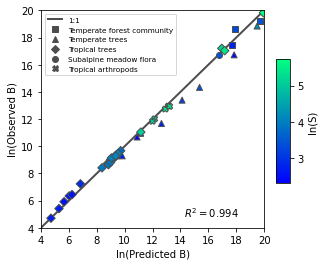

In [33]:
# Figure 1
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
xdata = np.log(data['pBnum'])
ydata = np.log(data['B'])
# Loop through each site type to put a different marker
for m,s in zip(mlist,stype):
    inds = data['Type']==s
    im = ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds]),norm=norm,cmap=cm,edgecolor='0.3')
    
# Colorbar
cax = fig.add_axes([0.94, 0.28, 0.05, 0.43])
fig.colorbar(im, cax = cax,label='ln(S)')
    
# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)
# Set so the axis ticks are the same
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end+1, 2))
ax.xaxis.set_ticks(np.arange(start, end+1, 2))

# Labels
ax.set_xlabel('ln(Predicted B)')
ax.set_ylabel('ln(Observed B)')

 # Add in R^2 value from regression
lin = linregress(xdata,ydata)
xlin = np.linspace(xmin,xmax)
ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.64,0.17),xycoords='figure fraction')
# Previous location was (0.73,0.17)

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")

# Plot 1:1 line at the back and add to legend codes
xrange = np.linspace(rmin,rmax)
leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
lcodes = np.insert(stype,0,'1:1')

ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3})#,frameon=False)#borderpad=0.0)

# Save
fig.savefig('Figures/fig1.pdf',bbox_inches='tight')

## Figure 2

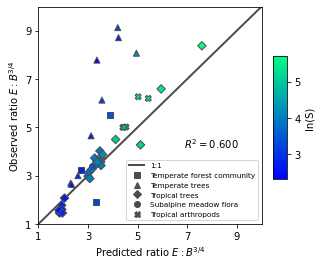

In [34]:
# Figure 2
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
xdata = data['E']/data['pBnum']**(3/4)
ydata = data['E']/data['B']**(3/4)
# Loop through each site type to put a different marker
for m,s in zip(mlist,stype):
    inds = data['Type']==s
    im = ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds]),norm=norm,cmap=cm,edgecolor='0.3')

# Colorbar
cax = fig.add_axes([0.94, 0.28, 0.05, 0.43])
fig.colorbar(im, cax = cax,label='ln(S)')


# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)
# Set so the axis ticks are the same
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end+1, 2))
ax.xaxis.set_ticks(np.arange(start, end+1, 2))

# Labels
ax.set_xlabel(r'Predicted ratio $E:B^{3/4}$')
ax.set_ylabel(r'Observed ratio $E:B^{3/4}$')

# Add in R^2 value from regression
lin = linregress(xdata,ydata)
xlin = np.linspace(xmin,xmax)
ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.64,0.41),xycoords='figure fraction')
# Previous location was (0.18,0.87)

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")
    
# Plot 1:1 line at the back and add to legend codes
xrange = np.linspace(rmin,rmax)
leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
lcodes = np.insert(stype,0,'1:1')

ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3},loc='lower right')#,frameon=False#borderpad=0.0)

# Save
fig.savefig('Figures/fig2.pdf',bbox_inches='tight')

# Figure 3
This figure is meant to show directly how this relationship works with changing $N$ and $S$ for $B/E^{3/4}$.

In [4]:
# We want to fix the values for the state variables where the approximations work alright, 
# and where the values are still relevant to the data.

# Set the fixed values based roughly on the median of the data while still being in a range where we can calculate B
efix = [1e5,1e6]
nfix = [500,5000]
sfix = [10,100]

# Set the size of range for n, s, e, ie. the number of points to calculate for the biomass when varying
# these variables across the range established above.
nd = 20 # Set default
ns = nd
nn = nd

# Set a range for S
srange = np.linspace(sfix[0],sfix[-1],num=ns)
# Set a range for N
nrange = np.logspace(np.log10(nfix[0]),np.log10(nfix[-1]),num=nn)

In [5]:
# For E/B^(3/4) vs. S calculate the biomass for continuously varying S and for two different values of N and E
BS = np.zeros([len(efix),len(nfix),ns])
for i in range(ns):
    for j,n in enumerate(nfix):
        for k,e in enumerate(efix):
            BS[k,j,i] = bm.biomass({'N':n,'E':e,'S':srange[i]})

# For E/B^(3/4) vs. N calculate the biomass for continuously varying N and for two different values of S and E
BN = np.zeros([len(efix),len(sfix),nn])
for i in range(nn):
    for j,s in enumerate(sfix):
        for k,e in enumerate(efix):
            BN[k,j,i] = bm.biomass({'N':nrange[i],'E':e,'S':s})

In [6]:
# Set up colors and markers
cmap_n = cmap.get_cmap('autumn')
cmap_s = cmap.get_cmap('winter')
c_n = [cmap_n(0.1),cmap_n(0.65)]
c_s = [cmap_s(0.1),cmap_s(0.75)]
lslist = ['-','--']

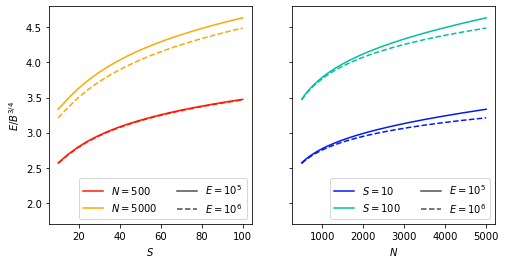

In [7]:
# Variant with E in both legends
# Now plot
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for i,e in enumerate(efix):
    for j,n in enumerate(nfix):
        axs[0].plot(srange,e/BS[i,j,:].T**(3/4),c=c_n[j],ls=lslist[i],label='N = {}, E = {:.0e}'.format(n,e))
    for k,s in enumerate(sfix):
        axs[1].plot(nrange,e/BN[i,k,:].T**(3/4),c=c_s[k],ls=lslist[i],label='S = {}, E = {:.0e}'.format(s,e))

axs[0].set_ylabel(r'$E/B^{3/4}$')
axs[0].set_xlabel(r'$S$')
axs[1].set_xlabel(r'$N$')

for ax in axs:
    ax.set_ylim(1.7,4.8)
#    ax.legend(loc='lower right')

# Now set up legend
# Plot a bunch of empty points to then reference
leg = {}
for cn,cs,lsl in zip(c_n,c_s,lslist):
    # For N
    leg[cn], = ax.plot([],[],c=cn,linestyle=lslist[0])
    # For S
    leg[cs], = ax.plot([],[],c=cs,linestyle=lslist[0])
    # For linestyle (E)
    leg[lsl], = ax.plot([],[],c='0.3',linestyle=lsl)

# Plot the legend. Note I wrote in N, S, and E by hand. Would have to change if changed fixed values above.
axs[0].legend([leg[s] for s in c_n+lslist],['$N = 500$', '$N = 5000$','$E = 10^5$','$E = 10^6$'],
              loc='lower right',ncol=2)
axs[1].legend([leg[s] for s in c_s+lslist],
              ['$S = 10$', '$S = 100$','$E = 10^5$','$E = 10^6$'],
              loc='lower right',ncol=2)
    
fig.savefig("Figures/fig3.pdf")